# Problem Statement

**Cardiovascular Disease Prediction Using Machine Learning**

# Dataset Summary

*   age – patient age
*   gender – 1 = male, 2 = female
*   height – in cm
*   weight – in kg
*   ap_hi – systolic blood pressure
*   ap_lo – diastolic blood pressure
*   cholesterol – 1/2/3 levels
*   gluc – glucose level (1/2/3)
*   smoke – 0/1
*   alco – alcohol intake 0/1
*   active – physically active 0/1
*   **cardio – target column (1 = disease, 0 = no disease)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cardio_train.csv",sep=";")

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Data types check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


##### Age into Year

In [5]:
df["age"] = (df["age"]/365).astype(int)

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


#### Remove ID column

In [7]:
df = df.drop('id',axis=1)

### Check null value

In [8]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Drop the duplicate values

In [9]:
df.duplicated().sum()

np.int64(3208)

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

#### Remove row if have some missing value

In [12]:
df = df.dropna()

#### some data is like below

In [13]:
df[(df['ap_hi'] < df['ap_lo'])].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,47,2,183,98.0,160,1100,1,2,1,0,1,1
241,60,2,157,60.0,160,1000,2,1,0,0,0,1
260,49,1,150,83.0,140,800,1,1,0,0,1,1
329,64,1,176,63.0,160,1000,2,2,0,0,0,1
345,51,1,154,81.0,140,1000,2,1,0,0,1,1


#### we need to fix this 

In [14]:
temp = df['ap_lo'] > df['ap_hi']

df.loc[temp, ['ap_lo', 'ap_hi']] = df.loc[temp, ['ap_hi', 'ap_lo']].values

In [15]:
df[(df['ap_hi'] < df['ap_lo'])].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [16]:
df['gender'] = df['gender'].map({1: 0, 2: 1})

#### By below we see that some values are not proper like no one have ap_hi 16020

In [17]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000
mean,52.859729,0.356210,164.341748,74.521160,144.497185,82.180620,1.382725,1.236106,0.092137,0.056294,0.798539,0.511933
std,6.803670,0.478882,8.333904,14.580675,245.836657,13.928581,0.690132,0.582063,0.289221,0.230491,0.401095,0.499861
min,29.000000,0.000000,55.000000,10.000000,12.000000,-150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,1.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,250.000000,200.000000,16020.000000,220.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df['ap_hi'] = df['ap_hi'].clip(70,250)
df['ap_lo'] = df['ap_lo'].clip(40,150)

#### now fixed

In [19]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000
mean,52.859729,0.356210,164.341748,74.521160,128.701776,82.165394,1.382725,1.236106,0.092137,0.056294,0.798539,0.511933
std,6.803670,0.478882,8.333904,14.580675,22.628002,12.536800,0.690132,0.582063,0.289221,0.230491,0.401095,0.499861
min,29.000000,0.000000,55.000000,10.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,1.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,250.000000,200.000000,250.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df.shape

(66792, 13)

#### Calculate BMI  

In [21]:
df['bmi'] = df['weight']/(df['height']/100)**2

In [22]:
cols = list(df.columns)
i, j = cols.index('cardio'), cols.index('bmi')
cols[i], cols[j] = cols[j], cols[i]
cols

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'bmi',
 'cardio']

In [23]:
df = df[cols]
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,21.967120,0
1,55,0,156,85.0,140,90,3,1,0,0,1,34.927679,1
2,51,0,165,64.0,130,70,3,1,0,0,0,23.507805,1
3,48,1,169,82.0,150,100,1,1,0,0,1,28.710479,1
4,47,0,156,56.0,100,60,1,1,0,0,0,23.011177,0


#### Matrix for to see how the features are related with each other

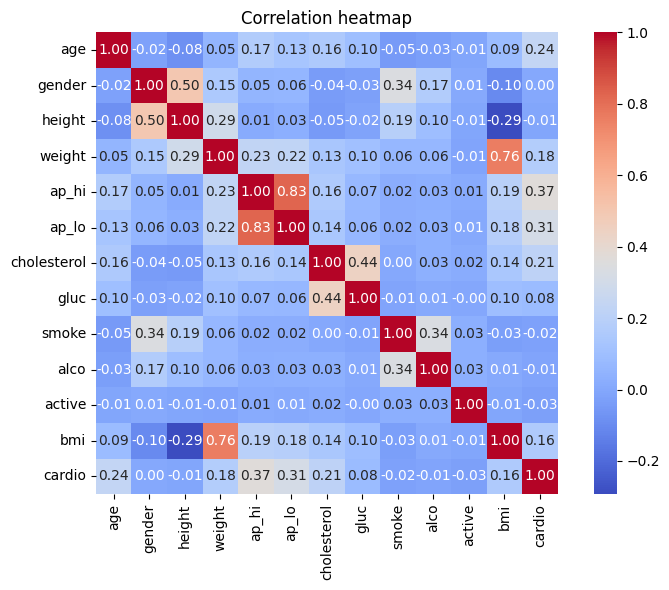

In [24]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

Graphs for better Visualizing

<Figure size 640x480 with 0 Axes>

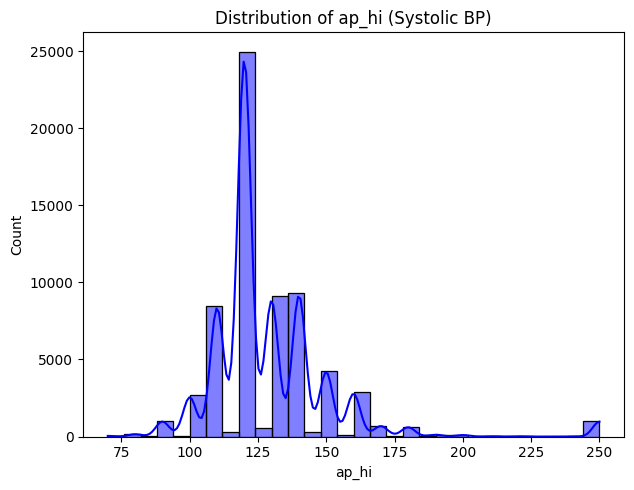

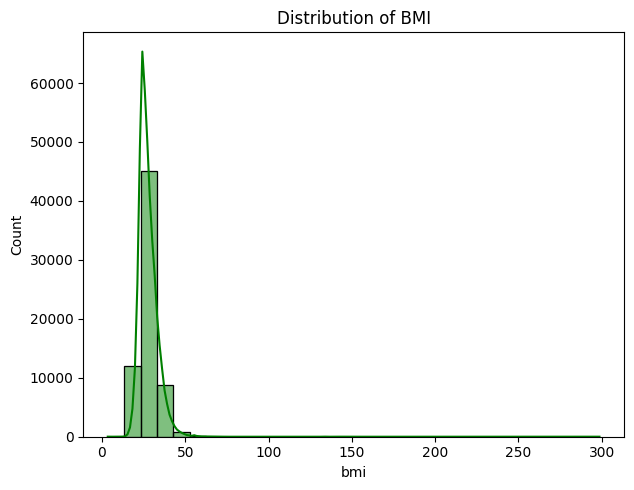

In [25]:
plt.tight_layout()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['ap_hi'], bins= 30, kde=True, color='blue')
plt.title('Distribution of ap_hi (Systolic BP)')

plt.tight_layout()
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.histplot(df['bmi'], bins=30, kde=True, color='green')
plt.title('Distribution of BMI')
plt.tight_layout()
plt.show()

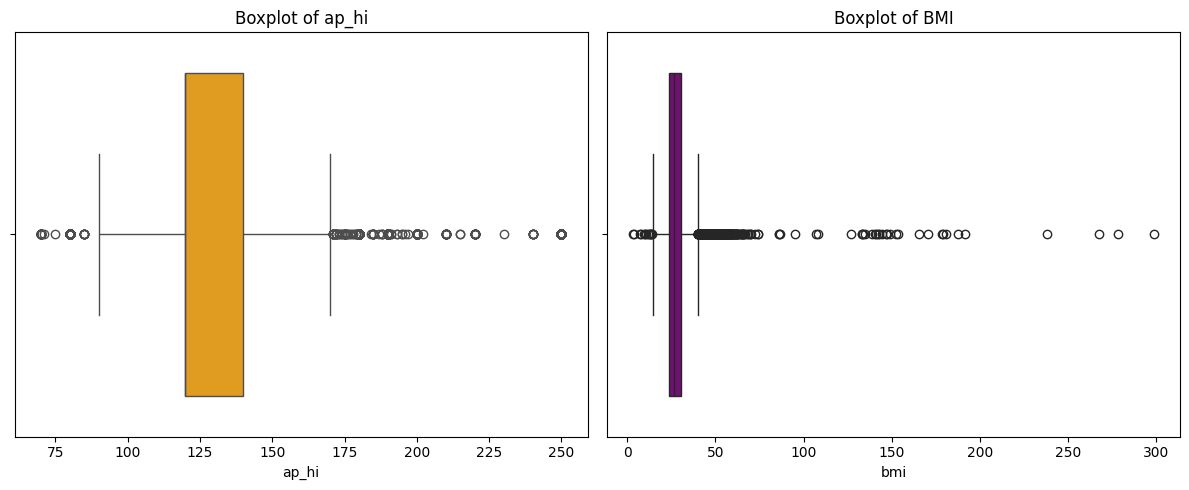

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['ap_hi'], color='orange')
plt.title('Boxplot of ap_hi')

plt.subplot(1,2,2)
sns.boxplot(x=df['bmi'], color='purple')
plt.title('Boxplot of BMI')
plt.tight_layout()
plt.show()

In [29]:
df.to_csv('cleaned.csv',index=False)